#### Step 1: Import Libraries


In [89]:
# Import all necessary libraries for data analysis, visualization, model building, and evaluation.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix , roc_auc_score


#### Step 2: Loading Dataset


In [90]:
# Load the dataset from the provided URL

url = 'https://raw.githubusercontent.com/GangasrinivasKatraji/Mobile-Price-Range-Prediction-Analysis/main/Dataset/datasets_11167_15520_train.csv'
df = pd.read_csv(url)


In [91]:
# Displaying the first five rows of the dataset.
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [92]:
# Finding STD
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [93]:
# Getting the info of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [94]:
# Finding the null values in the dataset.
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Step 3: Data Visualization 


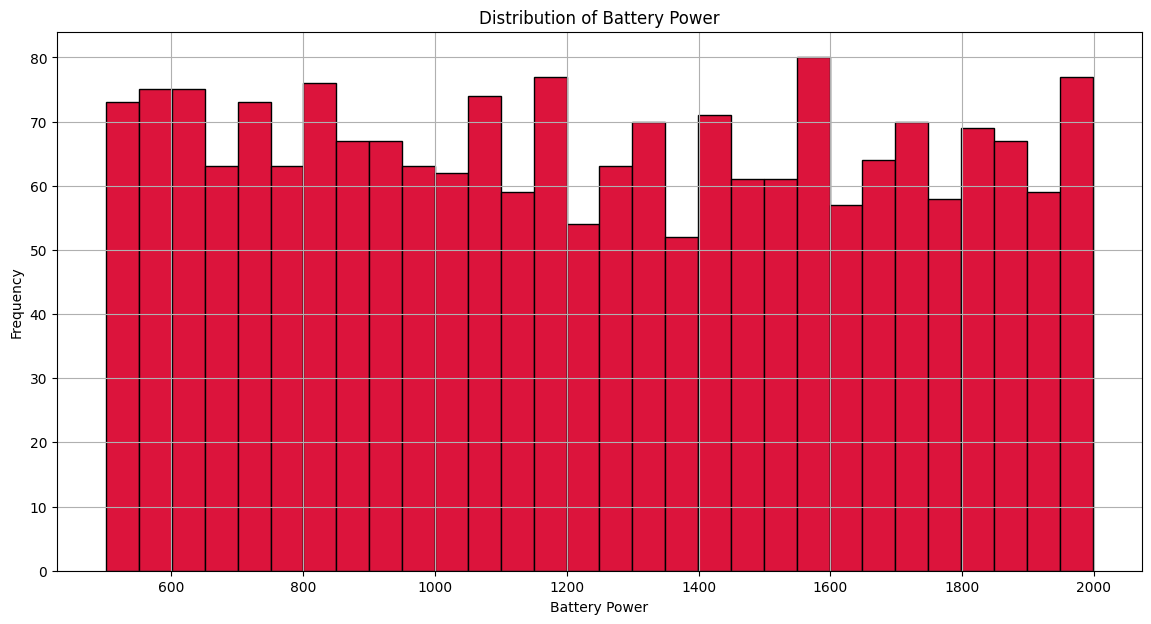

In [95]:
# 3.1. Distribution of Battery Power

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Plotting a histogram of the 'battery_power' column with 30 bins
plt.hist(df['battery_power'], bins=30, color='crimson', edgecolor='black')

# Setting labels and title
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Power')

# Adding gridlines for better readability
plt.grid(True)

# Displaying the plot
plt.show()


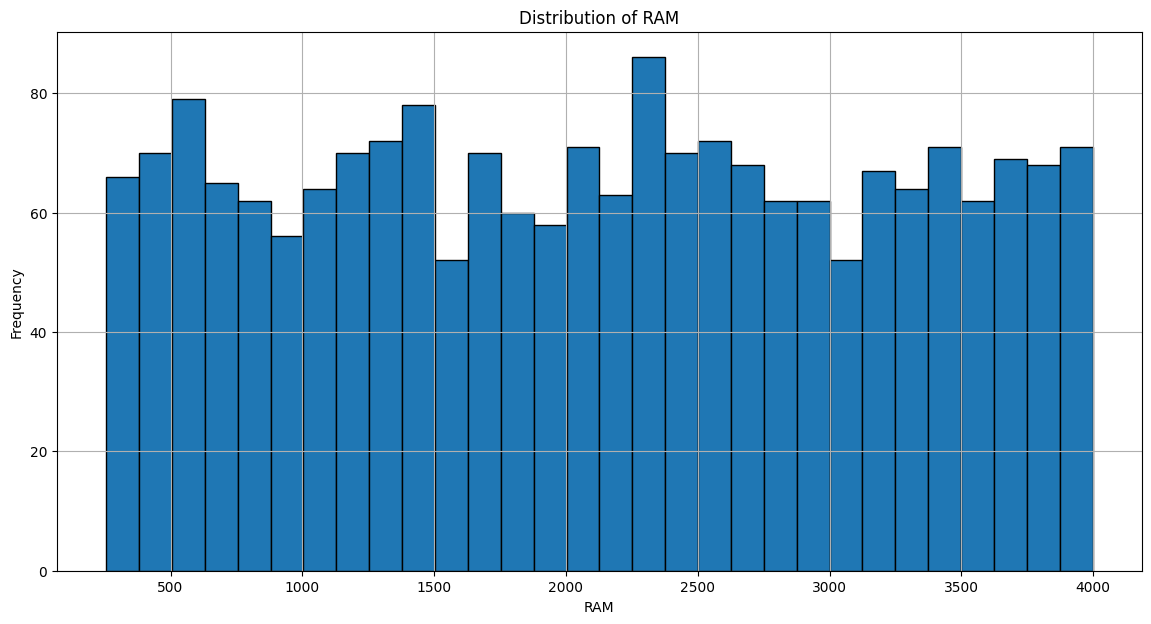

In [96]:
# 3.2. Distribution of RAM

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Plotting a histogram of the 'ram' column with 30 bins
plt.hist(df['ram'], bins=30, color='tab:blue', edgecolor='black')

# Setting labels and title
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Distribution of RAM')

# Adding gridlines for better readability
plt.grid(True)

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\2507458078.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range', order=df['price_range'].value_counts().index, palette=color_palette)


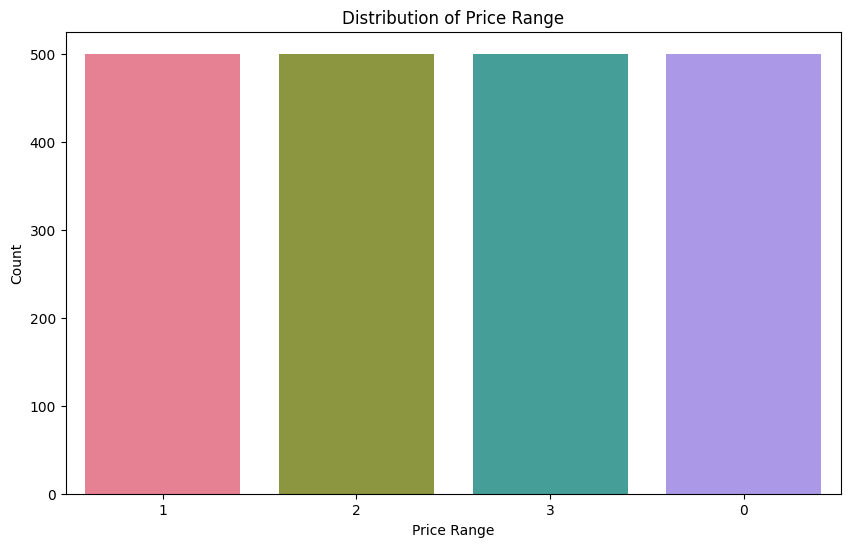

In [97]:
# 3.3. Price Range Distribution

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the distribution of 'price_range'
color_palette = sns.color_palette("husl", len(df['price_range'].unique()))
# sns.countplot(data=df, x='price_range', palette='viridis')
sns.countplot(data=df, x='price_range', order=df['price_range'].value_counts().index, palette=color_palette)


# Setting labels and title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Range')

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\1765259687.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y='battery_power', palette='Set3')


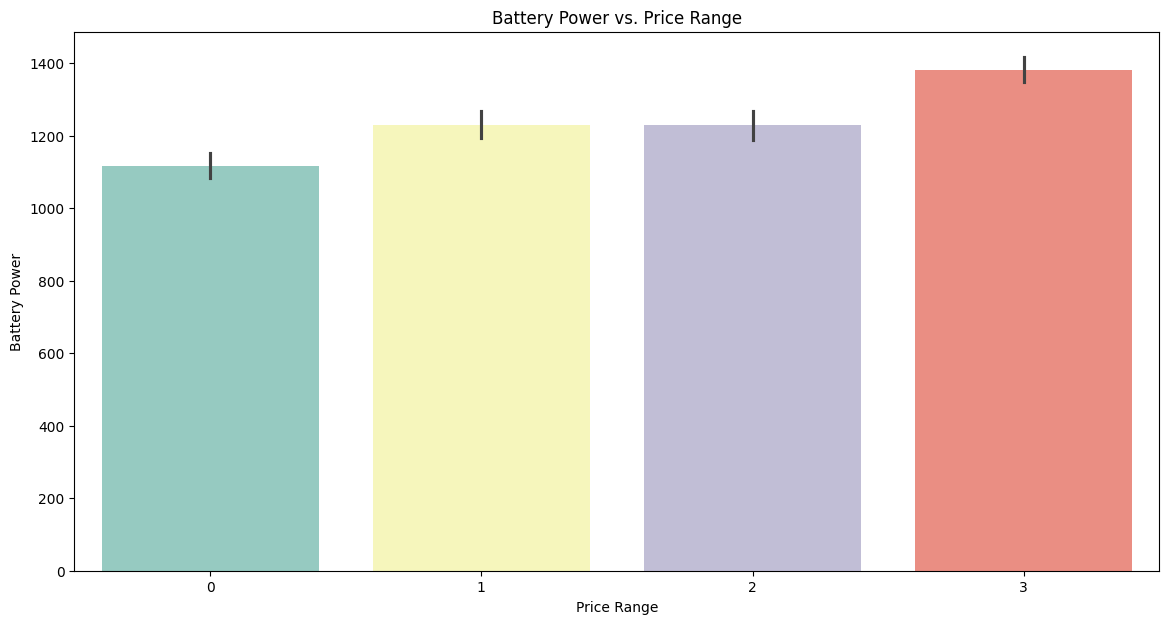

In [98]:
# 3.4. Relationship Between Battery Power and Price Range

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a box plot to visualize the relationship between 'battery_power' and 'price_range'
sns.barplot(data=df, x='price_range', y='battery_power', palette='Set3')

# Setting labels and title
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power vs. Price Range')

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\2059162942.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y='ram', palette='Set2')


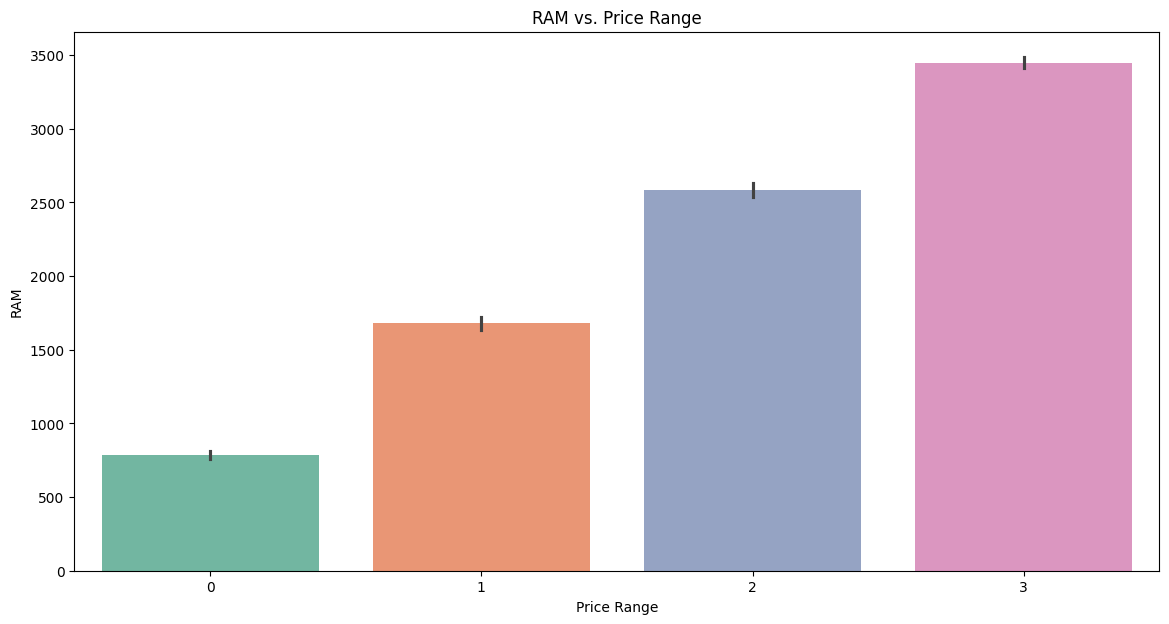

In [99]:
# 3.5. Relationship Between RAM and Price Range

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a box plot to visualize the relationship between 'ram' and 'price_range'
sns.barplot(data=df, x='price_range', y='ram', palette='Set2')

# Setting labels and title
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.title('RAM vs. Price Range')

# Displaying the plot
plt.show()


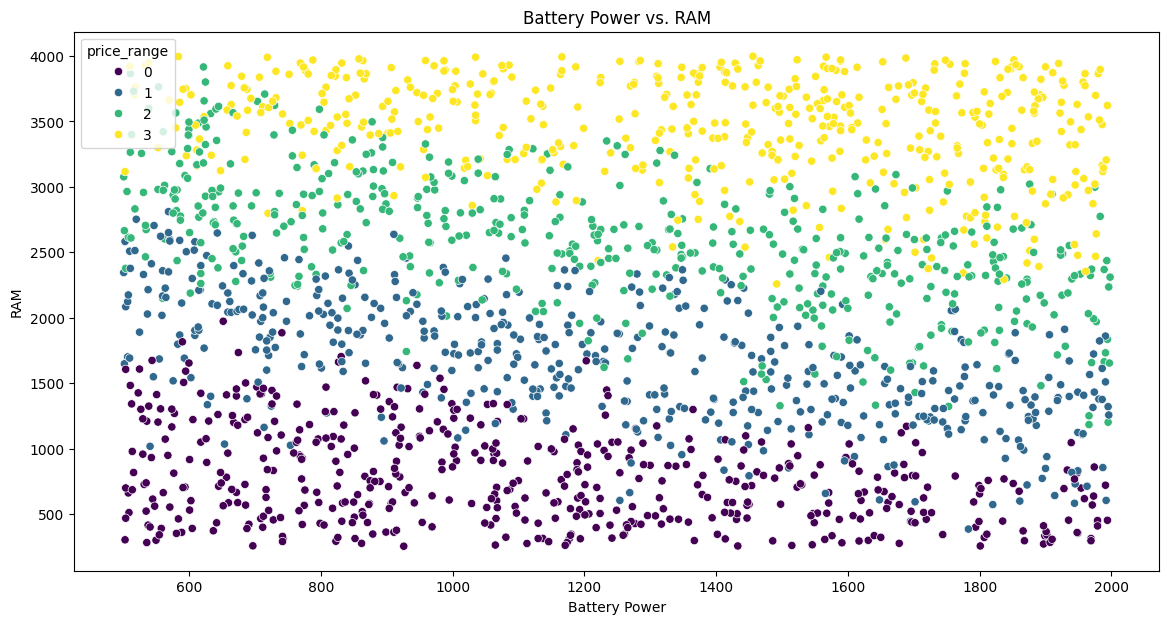

In [100]:
# 3.6. Relationship Between Battery Power and RAM

# Setting the size of the figure for our plot to be 14 inches wide and 7 inches tall
plt.figure(figsize=(14, 7))

# Creating a scatter plot to visualize the relationship between 'battery_power' and 'ram'
sns.scatterplot(data=df, x='battery_power', y='ram', hue='price_range', palette='viridis')

# Setting labels and title
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.title('Battery Power vs. RAM')

# Displaying the plot
plt.show()


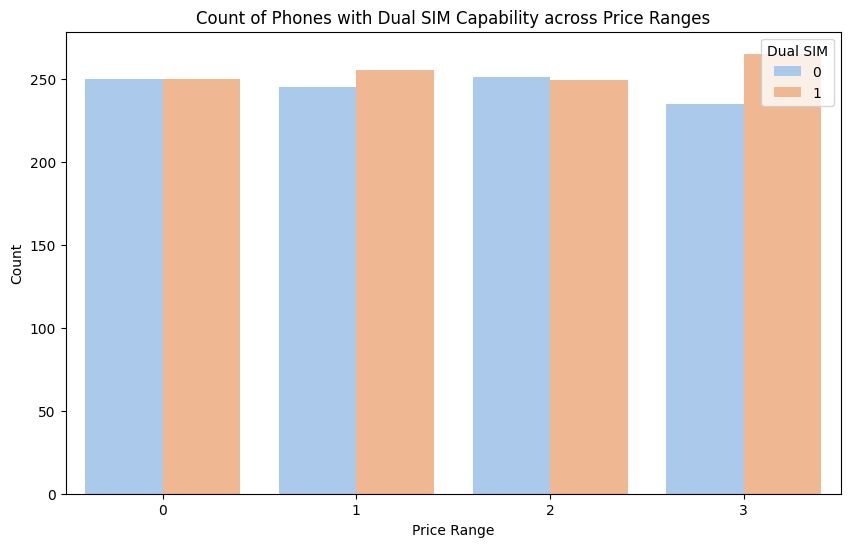

In [101]:
# 3.7. Count of Phones with Dual SIM Capability across Price Ranges:

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the number of phones with and without dual SIM capability across 'price_range'
sns.countplot(data=df, x='price_range', hue='dual_sim', palette='pastel')

# Setting labels and title
plt.title('Count of Phones with Dual SIM Capability across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Dual SIM')

# Displaying the plot
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_552\4245330822.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y='clock_speed', palette='muted')


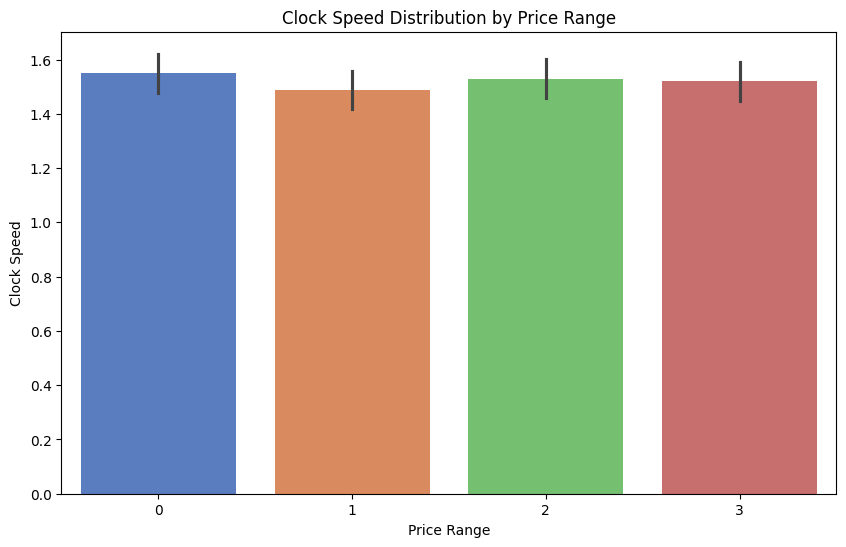

In [102]:
# 3.8. Clock Speed Distribution by Price Range:

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a violin plot to visualize the distribution of 'clock_speed' across different 'price_range'
sns.barplot(data=df, x='price_range', y='clock_speed', palette='muted')

# Setting labels and title
plt.title('Clock Speed Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Clock Speed')

# Displaying the plot
plt.show()



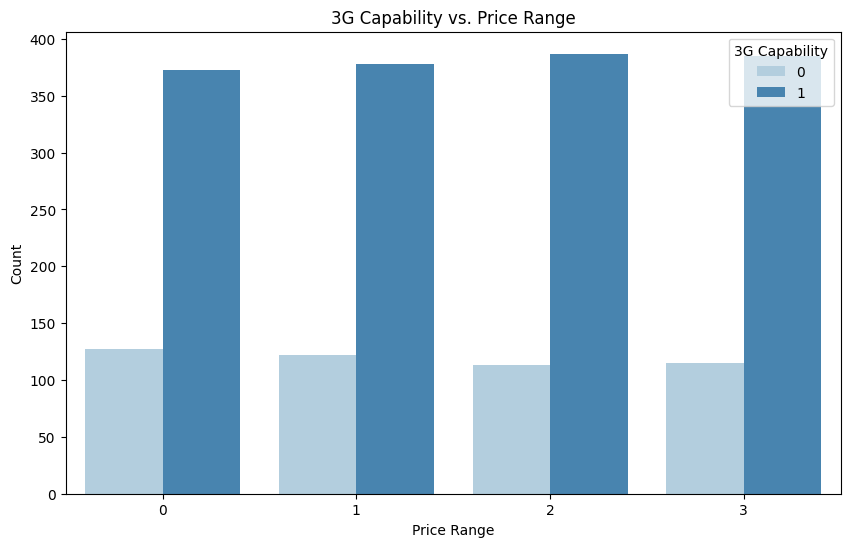

In [103]:
# 3.9. 3G Capability vs. Price Range:

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the number of phones with and without 3G capability across 'price_range'
sns.countplot(data=df, x='price_range', hue='three_g', palette='Blues')

# Setting labels and title
plt.title('3G Capability vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='3G Capability')

# Displaying the plot
plt.show()


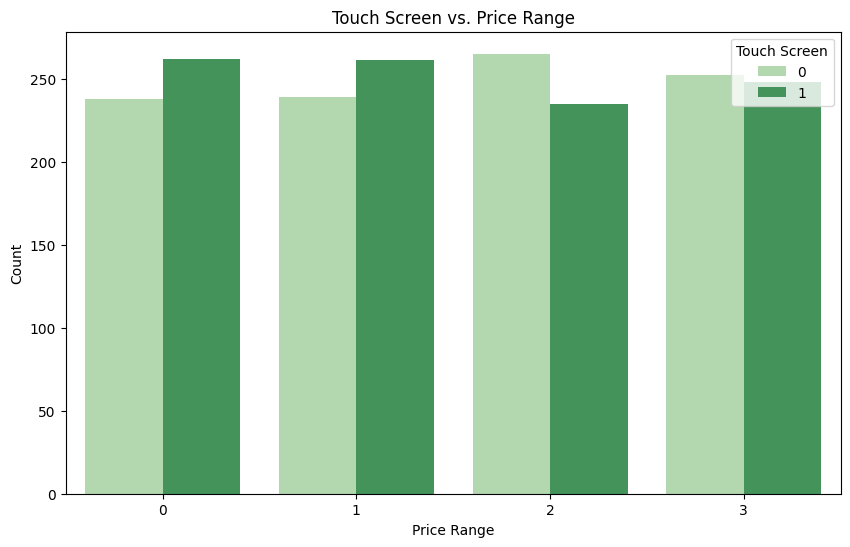

In [104]:
# 3.10. Touch Screen vs. Price Range:

# Setting the size of the figure for our plot to be 10 inches wide and 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a count plot to visualize the number of phones with and without touch screens across 'price_range'
sns.countplot(data=df, x='price_range', hue='touch_screen', palette='Greens')

# Setting labels and title
plt.title('Touch Screen vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Touch Screen')

# Displaying the plot
plt.show()


#### Step 4: Data Preprocessing


In [105]:
# Prepare the data for model training by splitting into features and target, and applying feature scaling.

# Split the data into features (X) and target (y)
X = df.drop('price_range', axis=1)  # Features: all columns except 'price_range'
y = df['price_range']  # Target variable: 'price_range'

# Train-test split with 70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the training data with StandardScaler
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler from training data
X_test = scaler.transform(X_test)


#### Step 5: Model Building and Evaluation 

In [106]:
# 5.1. Logistic Regression
# Initializing the model
model_lr = LogisticRegression(max_iter=200, random_state=42)

# Fitting the model
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [107]:
# Making predictions
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)

# Evaluation
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lr, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

ROC AUC Score: 0.9983405602400466
Confusion Matrix:
[[144   7   0   0]
 [  3 142   1   0]
 [  0   7 135   6]
 [  0   0   1 154]]


In [108]:
# 5.2. Decision Tree Classifier
# Initializing the model
model_dt = DecisionTreeClassifier(random_state=42)

# Fitting the model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [109]:
# Making predictions
y_pred_dt = model_dt.predict(X_test)
y_prob_dt = model_dt.predict_proba(X_test)

# Evaluation
print("Decision Tree Classifier Report")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_dt, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier Report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       151
           1       0.75      0.81      0.78       146
           2       0.75      0.74      0.75       148
           3       0.88      0.86      0.87       155

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

ROC AUC Score: 0.8797093753931414
Confusion Matrix:
[[131  20   0   0]
 [ 13 118  14   1]
 [  0  20 110  18]
 [  0   0  22 133]]


In [110]:
# 5.3. Random Forest Classifier
# Initializing the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# Making predictions
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)

# Evaluation
print("Random Forest Classifier Report")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.81      0.82      0.82       146
           2       0.80      0.78      0.79       148
           3       0.92      0.92      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

ROC AUC Score: 0.9769312337231928
Confusion Matrix:
[[144   7   0   0]
 [ 10 120  16   0]
 [  0  21 115  12]
 [  0   0  13 142]]


In [112]:
# 5.4. Support Vector Machine (SVM)
# Initializing the model
model_svm = SVC(probability=True, random_state=42)

# Fitting the model
model_svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [113]:
# Making predictions
y_pred_svm = model_svm.predict(X_test)
y_prob_svm = model_svm.predict_proba(X_test)

# Evaluation
print("Support Vector Machine Report")
print(classification_report(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_svm, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Support Vector Machine Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.78      0.84      0.81       146
           2       0.85      0.82      0.84       148
           3       0.95      0.92      0.93       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600

ROC AUC Score: 0.9816468517389982
Confusion Matrix:
[[135  16   0   0]
 [ 14 123   9   0]
 [  0  19 122   7]
 [  0   0  13 142]]


In [114]:
# 5.5. Gradient Boosting Classifier
# Initializing the model
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fitting the model
model_gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [115]:
# Making predictions
y_pred_gb = model_gb.predict(X_test)
y_prob_gb = model_gb.predict_proba(X_test)

# Evaluation
print("Gradient Boosting Classifier Report")
print(classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_gb, multi_class='ovr'))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Gradient Boosting Classifier Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       151
           1       0.85      0.88      0.87       146
           2       0.83      0.82      0.83       148
           3       0.92      0.90      0.91       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

ROC AUC Score: 0.9821047566234158
Confusion Matrix:
[[144   7   0   0]
 [ 10 120  16   0]
 [  0  21 115  12]
 [  0   0  13 142]]


#### Step 6: Feature Importance


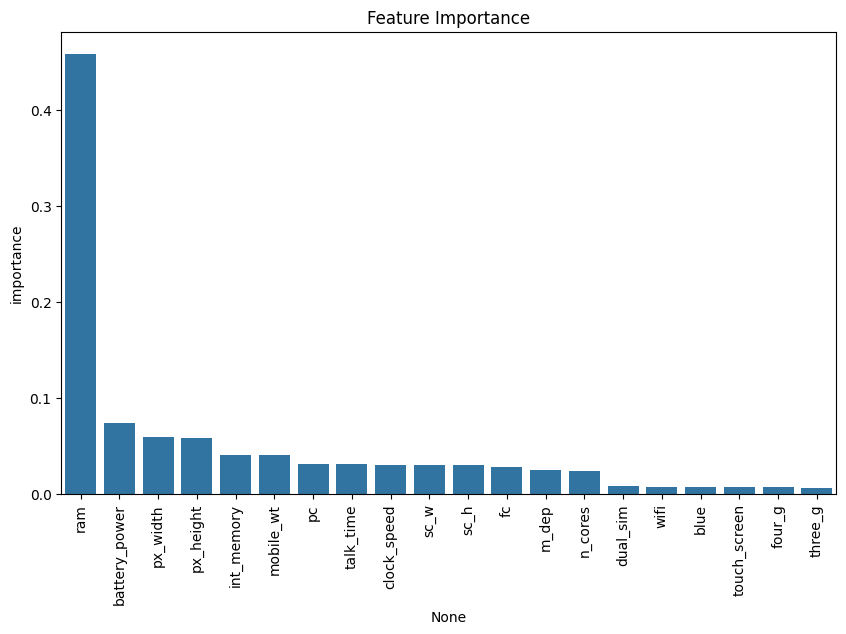

In [116]:
# Analyze the importance of each feature in predicting the price range using the Random Forest model.

# Feature importance from Random Forest
feature_importances = pd.DataFrame(rf_clf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()


#### Step 7: Business Impact Analysis


In [117]:
# Discuss the business impact of the predictive model and feature importance analysis.

print("\nBusiness Impact Analysis:")
print("1. Feature Importance:")
print("   - RAM: Crucial for performance.")
print("   - Battery Power: Key for user experience.")
print("   - Pixel Resolution: Important for display quality.")
print("2. Model Accuracy:")
print("   - Accurate predictions enable better pricing strategies.")
print("3. Customer Segmentation:")
print("   - Predicting price range helps in targeting specific segments.")
print("4. Cost Management:")
print("   - Optimize specifications to balance cost and performance.")



Business Impact Analysis:
1. Feature Importance:
   - RAM: Crucial for performance.
   - Battery Power: Key for user experience.
   - Pixel Resolution: Important for display quality.
2. Model Accuracy:
   - Accurate predictions enable better pricing strategies.
3. Customer Segmentation:
   - Predicting price range helps in targeting specific segments.
4. Cost Management:
   - Optimize specifications to balance cost and performance.


#### Step 8: Challenges and Techniques


In [118]:
# Highlighting the challenges faced during the project and the techniques used to address them.

print("\nChallenges and Techniques:")
print("1. Data Imbalance:")
print("   - Use techniques like SMOTE for balancing.")
print("2. Feature Scaling:")
print("   - Standardize features using StandardScaler.")
print("3. Model Overfitting:")
print("   - Use cross-validation and parameter tuning to prevent overfitting.")



Challenges and Techniques:
1. Data Imbalance:
   - Use techniques like SMOTE for balancing.
2. Feature Scaling:
   - Standardize features using StandardScaler.
3. Model Overfitting:
   - Use cross-validation and parameter tuning to prevent overfitting.
